<center>
<b><font size=6>Industry 4.0 의 중심, AI - ML&DL</font></b>
</center>

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect7. Learning rate, Evaluation

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

### Training and Test datasets

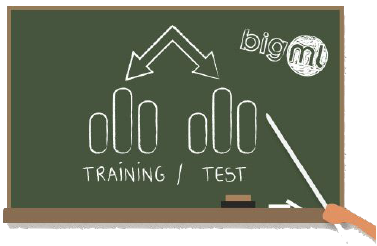

In [2]:
bpc.Figure(bpc.ML07_IMG_01)

### learning_rate 에 따른 학습
> 
- Case1 : learning_rate = 0.1
- Case2 : learning_rate = 1.5
- Case3 : learning_rate = 1e-5

### <font color='brown'> Case1 : learning_rate = 0.1 </font>

In [3]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

learning_rate = 0.1

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


In [4]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n W : {}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 5.732029914855957 
 W : [[ 0.72881663  0.71536207 -1.18015325]
 [-0.57753736 -0.12988332  1.60729778]
 [ 0.48373488 -0.51433605 -2.02127004]]

 Step : 20 
 Cost : 1.6610023975372314 
 W : [[ 0.35837555  0.7006911  -0.79504126]
 [-0.52181041 -0.14752226  1.56920958]
 [-0.00524238 -0.21694626 -1.82968259]]

 Step : 40 
 Cost : 1.4070582389831543 
 W : [[ 0.08632906  0.64415342 -0.4664571 ]
 [-0.27831453 -0.19541714  1.37360859]
 [-0.14105876 -0.16434807 -1.74646449]]

 Step : 60 
 Cost : 1.2188071012496948 
 W : [[-0.14574495  0.58043301 -0.17066269]
 [-0.1107576  -0.17286882  1.18350339]
 [-0.22450291 -0.17601469 -1.65135348]]

 Step : 80 
 Cost : 1.071008563041687 
 W : [[-0.3455095   0.51687729  0.09265763]
 [ 0.01382132 -0.11677328  1.00282907]
 [-0.28096494 -0.21812555 -1.55278051]]

 Step : 100 
 Cost : 0.9537603259086609 
 W : [[-0.52009284  0.45806164  0.32605675]
 [ 0.11236367 -0.04872466  0.83623803]
 [-0.32143879 -0.27116382 -1.45926809]]

 Step : 120 
 Cos

### <font color='brown'> Case2 : learning_rate = 1.5 </font>

In [5]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

learning_rate = 1.5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


In [6]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0 or step<5:
            print("\n Step : {} \n Cost : {} \n W : {}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))



 Step : 0 
 Cost : 5.191886901855469 
 W : [[-1.74910414  0.25865757  2.02017808]
 [ 1.79197454 -4.25928307  1.92508519]
 [ 2.94994736 -2.24503326 -1.05604184]]

 Step : 1 
 Cost : 23.448177337646484 
 W : [[-2.85528326  0.82115757  2.56385708]
 [-2.29496002 -1.63428307  3.38701963]
 [-1.15580797  0.56746674  0.23721349]]

 Step : 2 
 Cost : 21.729793548583984 
 W : [[-2.48028326  1.38365209  1.62636256]
 [ 0.14253998  0.99070597 -1.6754694 ]
 [ 1.28169203  3.37994409 -5.0127635 ]]

 Step : 3 
 Cost : 15.789323806762695 
 W : [[-2.10552645  0.44639546  2.18886232]
 [ 2.57954121 -2.94629526 -0.17546964]
 [ 3.71893597 -0.36979985 -3.7002635 ]]

 Step : 4 
 Cost : 25.514022827148438 
 W : [[-3.23052049  1.0088954   2.75135636]
 [-1.5454464  -0.32129526  1.32451844]
 [-0.40605783  2.44270015 -2.38776946]]

 Step : 20 
 Cost : nan 
 W : [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]

 Step : 40 
 Cost : nan 
 W : [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]

 Step : 60 
 

### <font color='brown'> Case3 : learning_rate = 1e-5 </font>

In [7]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

learning_rate = 1e-5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


In [8]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n W : {}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))



 Step : 0 
 Cost : 6.202129364013672 
 W : [[-0.82213634 -0.2921946   0.99954295]
 [ 1.22071064 -0.57640767 -1.41124773]
 [-0.65411896 -0.61369926 -1.53072631]]

 Step : 20 
 Cost : 6.197155952453613 
 W : [[-0.82228535 -0.2921207   0.99961805]
 [ 1.22016227 -0.57605958 -1.41104746]
 [-0.65466493 -0.61332732 -1.53055227]]

 Step : 40 
 Cost : 6.192182540893555 
 W : [[-0.82243437 -0.29204679  0.99969316]
 [ 1.21961391 -0.57571149 -1.41084719]
 [-0.65521091 -0.61295539 -1.53037822]]

 Step : 60 
 Cost : 6.1872100830078125 
 W : [[-0.82258338 -0.29197288  0.99976826]
 [ 1.21906555 -0.5753634  -1.41064692]
 [-0.65575689 -0.61258346 -1.53020418]]

 Step : 80 
 Cost : 6.182237148284912 
 W : [[-0.82273239 -0.29189897  0.99984336]
 [ 1.21851718 -0.57501531 -1.41044664]
 [-0.65630287 -0.61221153 -1.53003013]]

 Step : 100 
 Cost : 6.177264213562012 
 W : [[-0.8228814  -0.29182506  0.99991846]
 [ 1.21796882 -0.57466722 -1.41024637]
 [-0.65684885 -0.61183959 -1.52985609]]

 Step : 120 
 Cost :

### Non-normalized inputs
> Linear regression without min, max
- 너무나 심플하고 멋진 모델임에도 불구하고 학습해보면 NaN 이 발생
- 해결방안 : Nomalized 한다거나, MinMaxScaler 함수 사용

In [9]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])
# print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(" x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


 x_data : 
[[  8.28659973e+02   8.33450012e+02   9.08100000e+05   8.28349976e+02]
 [  8.23020020e+02   8.28070007e+02   1.82810000e+06   8.21655029e+02]
 [  8.19929993e+02   8.24400024e+02   1.43810000e+06   8.18979980e+02]
 [  8.16000000e+02   8.20958984e+02   1.00810000e+06   8.15489990e+02]
 [  8.19359985e+02   8.23000000e+02   1.18810000e+06   8.18469971e+02]
 [  8.19000000e+02   8.23000000e+02   1.19810000e+06   8.16000000e+02]
 [  8.11700012e+02   8.15250000e+02   1.09810000e+06   8.09780029e+02]
 [  8.09510010e+02   8.16659973e+02   1.39810000e+06   8.04539978e+02]]  

 y_data : 
[[ 831.659973]
 [ 828.070007]
 [ 824.159973]
 [ 819.23999 ]
 [ 818.97998 ]
 [ 820.450012]
 [ 813.669983]
 [ 809.559998]]


In [10]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print("step : {}, \t Cost : {}".format(step, cost_val))
    # print("\n step : {}, \n Cost : {} \n Prediction : {}".format(step, cost_val, hy_val))

step : 0, 	 Cost : 930746335232.0
step : 1, 	 Cost : 1.0225925276079661e+27
step : 2, 	 Cost : inf
step : 3, 	 Cost : inf
step : 4, 	 Cost : inf
step : 5, 	 Cost : inf
step : 6, 	 Cost : nan
step : 7, 	 Cost : nan
step : 8, 	 Cost : nan
step : 9, 	 Cost : nan
step : 10, 	 Cost : nan
step : 11, 	 Cost : nan
step : 12, 	 Cost : nan
step : 13, 	 Cost : nan
step : 14, 	 Cost : nan
step : 15, 	 Cost : nan
step : 16, 	 Cost : nan
step : 17, 	 Cost : nan
step : 18, 	 Cost : nan
step : 19, 	 Cost : nan
step : 20, 	 Cost : nan
step : 21, 	 Cost : nan
step : 22, 	 Cost : nan
step : 23, 	 Cost : nan
step : 24, 	 Cost : nan
step : 25, 	 Cost : nan
step : 26, 	 Cost : nan
step : 27, 	 Cost : nan
step : 28, 	 Cost : nan
step : 29, 	 Cost : nan
step : 30, 	 Cost : nan
step : 31, 	 Cost : nan
step : 32, 	 Cost : nan
step : 33, 	 Cost : nan
step : 34, 	 Cost : nan
step : 35, 	 Cost : nan
step : 36, 	 Cost : nan
step : 37, 	 Cost : nan
step : 38, 	 Cost : nan
step : 39, 	 Cost : nan
step : 40, 	 Cost : 

### Linear regression with min, max

In [11]:
a = np.arange(4).reshape((2,2))
a

array([[0, 1],
       [2, 3]])

In [12]:
np.min(a)

0

In [13]:
np.min(a, axis=0)

array([0, 1])

In [14]:
np.min(a, axis=1)

array([0, 2])

In [15]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    print(" max.data :\n {max}, \n min.data :\n {min}, \n numerator :\n {numerator}, \n denominator :\n {denominator} \n".format(
            max = np.max(data, 0), 
            min = np.min(data, 0),
            numerator = numerator,
            denominator = denominator
        ))

    # noise term prevents the zero division
    return numerator / (denominator + 1e-5)


xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

# print("np.max(xy, 0) :", np.max(xy, 0))
# print("np.min(xy, 0) :", np.min(xy, 0))

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print("xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) \n", xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print("\n x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


 max.data :
 [  8.28659973e+02   8.33450012e+02   1.82810000e+06   8.28349976e+02
   8.31659973e+02], 
 min.data :
 [  8.09510010e+02   8.15250000e+02   9.08100000e+05   8.04539978e+02
   8.09559998e+02], 
 numerator :
 [[  1.91499630e+01   1.82000120e+01   0.00000000e+00   2.38099980e+01
    2.20999750e+01]
 [  1.35100100e+01   1.28200070e+01   9.20000000e+05   1.71150510e+01
    1.85100090e+01]
 [  1.04199830e+01   9.15002400e+00   5.30000000e+05   1.44400020e+01
    1.45999750e+01]
 [  6.48999000e+00   5.70898400e+00   1.00000000e+05   1.09500120e+01
    9.67999200e+00]
 [  9.84997500e+00   7.75000000e+00   2.80000000e+05   1.39299930e+01
    9.41998200e+00]
 [  9.48999000e+00   7.75000000e+00   2.90000000e+05   1.14600220e+01
    1.08900140e+01]
 [  2.19000200e+00   0.00000000e+00   1.90000000e+05   5.24005100e+00
    4.10998500e+00]
 [  0.00000000e+00   1.40997300e+00   4.90000000e+05   0.00000000e+00
    0.00000000e+00]], 
 denominator :
 [  1.91499630e+01   1.82000120e+01   9.20

In [16]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print("step : {}, \t Cost : {}".format(step, cost_val))
    # print("\nstep", step, "\nCost:", cost_val, "\nPrediction:\n", hy_val)

step : 0, 	 Cost : 0.1672840565443039
step : 1, 	 Cost : 0.1672830879688263
step : 2, 	 Cost : 0.1672821193933487
step : 3, 	 Cost : 0.1672811508178711
step : 4, 	 Cost : 0.1672801822423935
step : 5, 	 Cost : 0.1672791987657547
step : 6, 	 Cost : 0.1672782301902771
step : 7, 	 Cost : 0.1672772467136383
step : 8, 	 Cost : 0.1672762930393219
step : 9, 	 Cost : 0.1672753244638443
step : 10, 	 Cost : 0.1672743409872055
step : 11, 	 Cost : 0.1672733724117279
step : 12, 	 Cost : 0.1672723889350891
step : 13, 	 Cost : 0.1672714352607727
step : 14, 	 Cost : 0.1672704815864563
step : 15, 	 Cost : 0.1672694981098175
step : 16, 	 Cost : 0.1672685146331787
step : 17, 	 Cost : 0.1672675609588623
step : 18, 	 Cost : 0.1672665774822235
step : 19, 	 Cost : 0.1672656089067459
step : 20, 	 Cost : 0.1672646403312683
step : 21, 	 Cost : 0.1672636866569519
step : 22, 	 Cost : 0.16726268827915192
step : 23, 	 Cost : 0.1672617495059967
step : 24, 	 Cost : 0.1672607809305191
step : 25, 	 Cost : 0.167259797453

### Mnist Introduction

### <font color="#CC0000">MNIST
> MNIST (Modified National Institute of Standards and Technology) 
- MNIST is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. 
- As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.


### 손글씨 숫자데이터
> 미국 우편국에서 우편번호를 분리하기 위해 손글씨 데이터를 머신러닝에 적용
<!--
![Graph](./images/lab07_mnist_dataset.png)
//-->

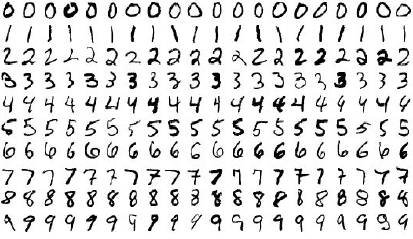

In [17]:
bpc.Figure(bpc.ML07_IMG_02)

### training & test set
<!--
![Graph](./images/lab07_mnist_traindata.png)
//-->

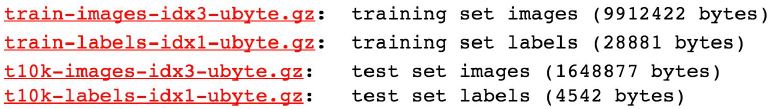

In [18]:
bpc.Figure(bpc.ML07_IMG_03)

### In the Neural Network terminology
> 
- one epoch = one forward pass and one backward pass of all the training examples
- batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
- number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).
<br><br>Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.
<br><br>
- In digital circuits, one-hot refers to a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

In [19]:
# Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
# 맨처음 최초한번만 mnist 다운로딩 이후는 로컬데이터 사용
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784L
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


### Training epoch / batch
> 
- epoch : one forward pass and one backward pass of all the training examples
- batch : the number of training examples in one forward/backward pass
- iterations : number of passes, each pass using [batch size]  number of examples
<br><br>Ex. <br>if you have 1000 training examples, and your batch size is 500,
<br>then it will take 2 iterations to complete 1 epoch.

Epoch: 0001 	 cost = 2.814546362
Epoch: 0002 	 cost = 1.138760629
Epoch: 0003 	 cost = 0.906234479
Epoch: 0004 	 cost = 0.790985886
Epoch: 0005 	 cost = 0.718591671
Epoch: 0006 	 cost = 0.667473713
Epoch: 0007 	 cost = 0.628179324
Epoch: 0008 	 cost = 0.597087095
Epoch: 0009 	 cost = 0.571154187
Epoch: 0010 	 cost = 0.549675500
Epoch: 0011 	 cost = 0.531540279
Epoch: 0012 	 cost = 0.514862220
Epoch: 0013 	 cost = 0.500897739
Epoch: 0014 	 cost = 0.488344261
Epoch: 0015 	 cost = 0.476432256
Learning finished
Accuracy:  0.8892
Label:  [9]
Prediction:  [9]


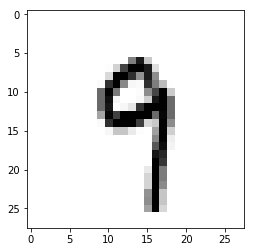

In [20]:
# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              '\t cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,
                                                  28), cmap='Greys', interpolation='nearest')
    plt.show()



In [27]:
# ? input_data.read_data_sets
# Signature: input_data.read_data_sets(train_dir, fake_data=False, one_hot=False, dtype=tf.float32, reshape=True, validation_size=5000, seed=None)
# Docstring: <no docstring>

In [31]:
# parameters
training_epochs = 15
batch_size = 100

sess = tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={
                        X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1),
          '\t cost =', '{:.9f}'.format(avg_cost))

print("Learning finished")

# Test the model using test sets
# print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
#       X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 	 cost = 2.812196488
Epoch: 0002 	 cost = 1.139083336
Epoch: 0003 	 cost = 0.906479853
Epoch: 0004 	 cost = 0.791767849
Epoch: 0005 	 cost = 0.718979787
Epoch: 0006 	 cost = 0.667431003
Epoch: 0007 	 cost = 0.627901456
Epoch: 0008 	 cost = 0.597089485
Epoch: 0009 	 cost = 0.571382432
Epoch: 0010 	 cost = 0.549482693
Epoch: 0011 	 cost = 0.530943853
Epoch: 0012 	 cost = 0.514988951
Epoch: 0013 	 cost = 0.500757529
Epoch: 0014 	 cost = 0.488304589
Epoch: 0015 	 cost = 0.476805941
Learning finished


### Report result on test dataset

In [32]:
# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.8902


### Sample image show and prediction
> 
- 랜덤하게 읽어온 이미지를 예측하여 실제 맞는지를 확인한다.

Label:  [3]
Prediction:  [3]


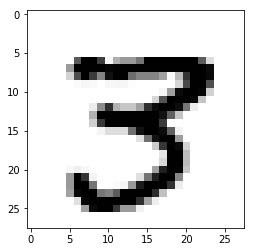

In [46]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

In [47]:
type(mnist.test.num_examples)

int

In [48]:
mnist.test.num_examples

10000

r: 7187
Label:  [5]
Prediction:  [5]


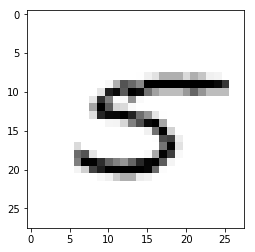

In [52]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("r:", r)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>